# 一眼就能看出我是股票小白的EDA工程

In [94]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 先看一眼数据

In [95]:
PATH = "../../data/PinganBank20170601.csv"
data = pd.read_csv(PATH, encoding='gbk')
data.columns = ["timestamp", "price", "quantity", "direction"]
data.head()
data.tail()
data.direction.unique()

,timestamp,price,quantity,direction
0,9:15:00,9.46,10.0,2S
1,9:15:00,8.46,1.0,2B
2,9:15:00,9.59,2545.0,2S
3,9:15:00,9.29,24.0,2S
4,9:15:00,9.34,25.0,2S


,timestamp,price,quantity,direction
33039,14:59:56,9.20,100.0,2S
33040,14:59:57,9.20,7.0,2S
33041,14:59:57,9.18,1041.8,2S
33042,14:59:57,9.19,10.0,2S
33043,14:59:59,9.18,5.0,2S


array(['2S', '2B', 'BC', 'SC', '1B', '1S'], dtype=object)

## 基于以上内容的发现与笔记:

timestamp: 可以看出该数据集包含平安股票9:15到3:00之间的数据

direction: 名义变量，其含义分别为
- 1B 市价买入
- 1S 市价卖出
- 2B 限价买入
- 2S 限价卖出
- BC 买方撤单
- SC 卖方撤单


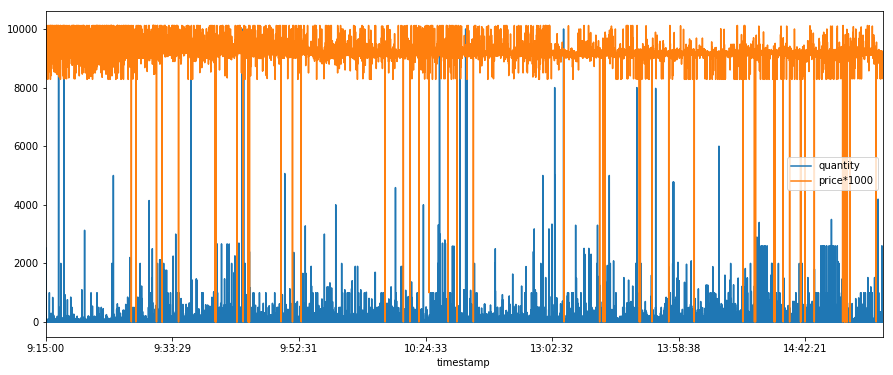

In [96]:
data["price*1000"] = data["price"]*1000
data.plot(x="timestamp", y=["quantity", "price*1000"], figsize=(15,6))

发现：
价格貌似为粒化过的数据，且聚集分布在8~10区间内，除了个别极小值

In [132]:
data.groupby(["price"])["price"].agg({"cnt":"count"})

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,cnt
price,
0.00,78
1.00,1
8.28,98
8.29,3
8.30,95
8.31,3
8.32,2
8.33,3
8.35,4


价格区间大部分为8:28到10:12，除了价格为0和1的特殊情况。

后根据调研得知：股票的价格只能是前一天的上下浮动10%内浮动，因而，可推算出前一天的开盘价为9.2。

## 进一步探索价格小于0的分布

In [82]:
data_price_lt_8 = data.query('price < 8')
data_price_lt_8.head()
data_price_lt_8.groupby('direction').count()

,timestamp,price,quantity,direction,price*1000
3385,9:30:00,0.0,9.0,1B,0.0
3565,9:30:00,0.0,168.0,1S,0.0
4378,9:31:44,0.0,460.0,1B,0.0
4379,9:31:44,0.0,25.0,1B,0.0
4594,9:32:34,0.0,336.0,1B,0.0


,timestamp,price,quantity,price*1000
direction,,,,
1B,40,40,40,40
1S,39,39,39,39
